<a href="https://www.kaggle.com/code/taf1404/plant-disease-classification?scriptVersionId=148128998" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# !pip install fastai

# Intro
* Plant disease classification models provide a faster and more objective approach to disease detection, leading to more accurate diagnoses, reduced use of pesticides, and more sustainable farming practices, ultimately promoting food security and the health of agricultural systems
*`FastAi` is very user friendly and has lots of features in-built and it saves time. so i decided to use `FastAi`.

### Importing libraries

In [2]:
from fastai import *
from fastai.vision.all import *
import albumentations as A 

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
%reload_ext autoreload 
%autoreload 2 
%matplotlib inline

In [4]:
count = {'Pepper__bell___Bacterial_spot':997,
        'Pepper__bell___healthy':1478,
        'Potato___Early_blight':1000,
        'Potato___Late_blight':1000,
        'Potato___healthy':152,
        'Tomato_Bacterial_spot':2127,
        'Tomato_Early_blight':1000,
        'Tomato_Late_blight':1909,
        'Tomato_Leaf_Mold':952,
        'Tomato_Septoria_leaf_spot':1771,
        'Tomato_Spider_mites_Two_spotted_spider_mite':1676,
        'Tomato__Target_Spot':1404,
         'Tomato__Tomato_YellowLeaf__Curl_Virus': 3209,
         'Tomato__Tomato_mosaic_virus':373,
         'Tomato_healthy':1591
        }

### Data Augmentation Example

In [5]:
TEST_IMAGE = '/kaggle/input/plant-test/test/Tomato_Late_blight.jpg'
img = PILImage(PILImage.create(TEST_IMAGE).resize((600,400)))

### RandomsizedCrop

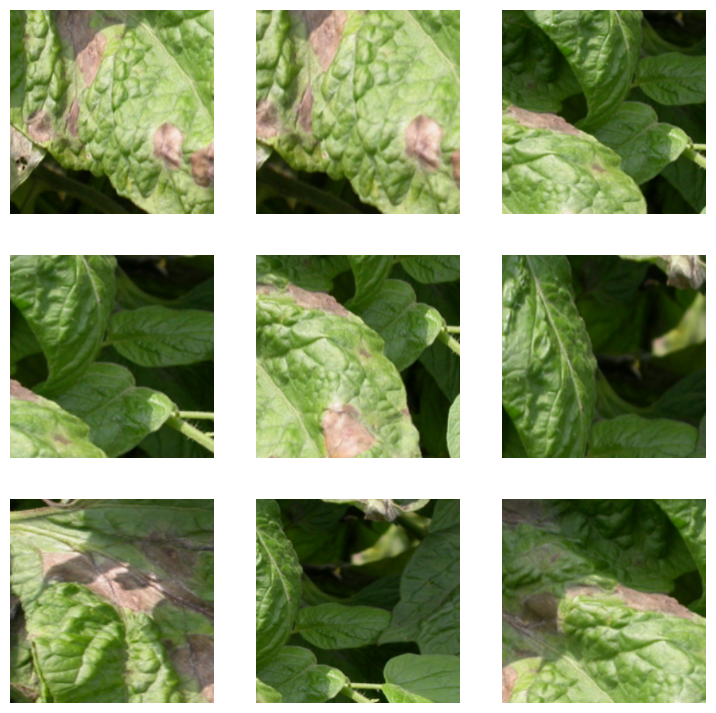

In [6]:
small_crop = RandomResizedCrop(256, min_scale=0.05, max_scale=0.15)
_,axs = plt.subplots(3,3,figsize=(9,9))
for ax in axs.flatten():
    cropped = small_crop(img)
    show_image(cropped, ctx=ax);

In [7]:
timg = TensorImage(array(img)).permute(2,0,1).float()/255.
def _batch_ex(bs): return TensorImage(timg[None].expand(bs, *timg.shape).clone())

### Zoom

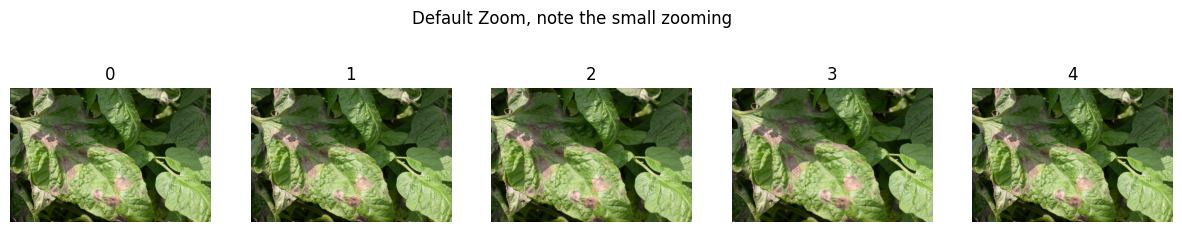

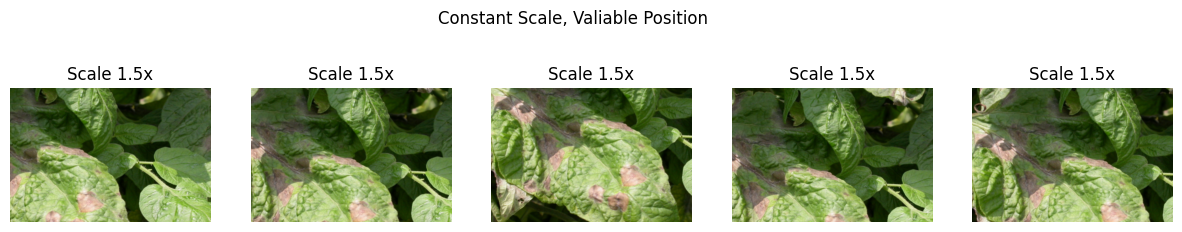

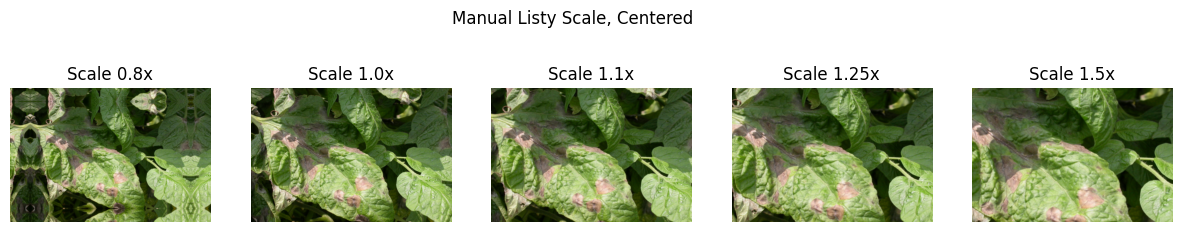

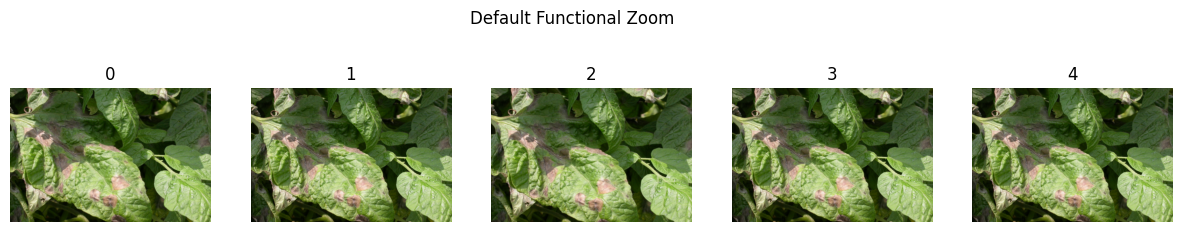

In [8]:
with no_random():
    scales = [0.8, 1., 1.1, 1.25, 1.5]
    imgs = _batch_ex(5)
    deflt = Zoom()
    const = Zoom(p=1., draw=1.5) #'Constant scale and different random centers'
    listy = Zoom(p=1.,draw=scales,draw_x=0.5, draw_y=0.5) #completely manual scales, constant center
    funct = Zoom(draw=lambda x: x.new_empty(x.size(0)).uniform_(1., 1.1)) #same as default

    show_images( deflt(imgs) ,suptitle='Default Zoom, note the small zooming', titles=[i for i in range(imgs.size(0))])
    show_images( const(imgs) ,suptitle='Constant Scale, Valiable Position', titles=[f'Scale 1.5x' for i in range(imgs.size(0))])
    show_images( listy(imgs) ,suptitle='Manual Listy Scale, Centered', titles=[f'Scale {i}x' for i in scales])
    show_images( funct(imgs) ,suptitle='Default Functional Zoom', titles=[i for i in range(imgs.size(0))]) #same as default

### Resize

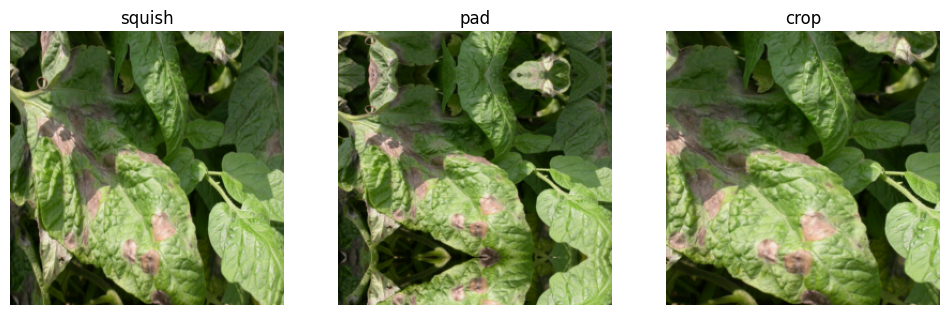

In [9]:
_,axs = plt.subplots(1,3,figsize=(12,4))
for ax,method in zip(axs.flatten(), [ResizeMethod.Squish, ResizeMethod.Pad, ResizeMethod.Crop]):
    rsz = Resize(256, method=method)
    show_image(rsz(img, split_idx=0), ctx=ax, title=method);

### Using custom albumentations augemantation
in this augmentation we used `CoarseDroput` which drops random holes from picture so it can detect even if image lose some its pixels

In [10]:
def aug_tfm(img): 
    np_img = np.array(img) # converts image to numpy array
    aug_img = aug(image=np_img)['image'] # applies transformation (defined outside of function)
    return PILImage.create(aug_img) #returns and visualizes PILImage

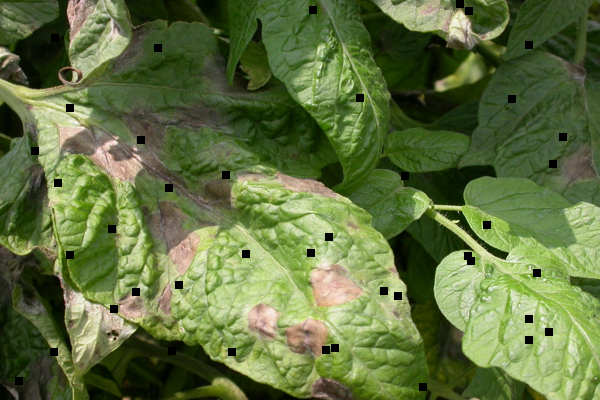

In [11]:
aug = A.CoarseDropout(p=1, min_holes = 40, max_holes=50)
aug_tfm(img)

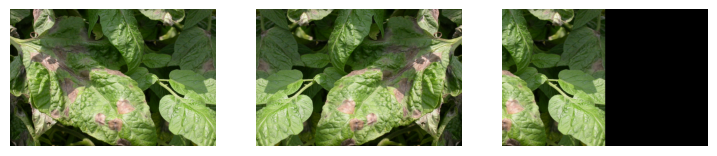

In [12]:
imgs=_batch_ex(3)
identity=torch.tensor([[1,0,0],[0,1,0.]])
flip=torch.tensor([[-1,0,0],[0,1,0.]])
translation=torch.tensor([[1,0,1.],[0,1,0]])
mats=torch.stack((identity,flip,translation))
show_images(imgs.affine_coord(mats,pad_mode=PadMode.Zeros)) 

# Importing Data

In [13]:
path = '/kaggle/input/plantdisease/PlantVillage/'

In [14]:
fns=get_image_files(path)
fns

(#20638) [Path('/kaggle/input/plantdisease/PlantVillage/Pepper__bell___Bacterial_spot/0f72db9c-d635-4415-9781-68937328aed2___NREC_B.Spot 9188.JPG'),Path('/kaggle/input/plantdisease/PlantVillage/Pepper__bell___Bacterial_spot/1b8d3e98-43d9-441d-93ef-a359e6e9ddc2___NREC_B.Spot 9052.JPG'),Path('/kaggle/input/plantdisease/PlantVillage/Pepper__bell___Bacterial_spot/b6d35d21-4812-4e32-ab9a-b6ddda8cbb79___JR_B.Spot 8972.JPG'),Path('/kaggle/input/plantdisease/PlantVillage/Pepper__bell___Bacterial_spot/e4e7e5a2-5aa1-4378-833d-9142358c7c9b___JR_B.Spot 9092.JPG'),Path('/kaggle/input/plantdisease/PlantVillage/Pepper__bell___Bacterial_spot/8b50f2db-cbf2-4758-bea6-a011f0cc1497___JR_B.Spot 3235.JPG'),Path('/kaggle/input/plantdisease/PlantVillage/Pepper__bell___Bacterial_spot/729b55d7-2a99-4861-910d-3b4e2bbce13a___JR_B.Spot 9036.JPG'),Path('/kaggle/input/plantdisease/PlantVillage/Pepper__bell___Bacterial_spot/4614ed01-e120-4ae9-8f13-028fa8297873___JR_B.Spot 8985.JPG'),Path('/kaggle/input/plantdisease/P

In [15]:
aug = A.CoarseDropout(p=1, min_holes = 40, max_holes=50) # or whatever transform from albumentations you want to use

# Custom data augmentator
class MyTransform(Transform):
    split_idx=None #runs on training and valid (0 for train, 1 for valid)
    order = 2 # runs after initial resize
    def __init__(self, aug): self.aug = aug
    def encodes(self, img: PILImage):
        aug_img = self.aug(image=np.array(img))['image']
        return PILImage.create(aug_img)


scales = [-0.4, -0.2, 0., 0.2, 0.4]
item_tfms_list = [Resize(224, method='squish'), RandomResizedCrop(224),MyTransform(aug)]

In [16]:
leaf=DataBlock(blocks=(ImageBlock,CategoryBlock),
               get_items=get_image_files,
               splitter=RandomSplitter(valid_pct=(0.2),seed=42),
               get_y=parent_label,
               item_tfms = item_tfms_list,
               batch_tfms = [*aug_transforms(mult=1.0, do_flip=True,
                                             flip_vert=True, max_rotate=10.,
                                             max_zoom=1.1,max_warp=0.2, 
                                             p_affine=0.75, p_lighting=0, 
                                             xtra_tfms=None), Normalize.from_stats(*imagenet_stats)]
              )

In [17]:
dls=leaf.dataloaders(path,num_workers = 0,bs=64)

# Modeling

In [18]:
learner=vision_learner(dls,resnet18,metrics=[accuracy, error_rate]) # we use resnet18 for avoiding overfitting

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 214MB/s]


### Finding best learning rate

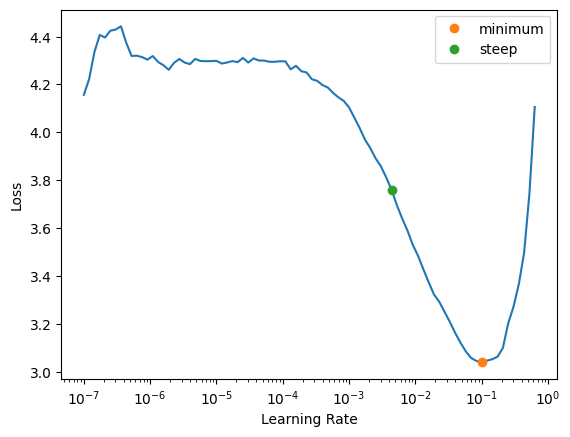

In [19]:
lr_min,lr_steep = learner.lr_find(suggest_funcs=(minimum,steep))

In [20]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 1.00e-02, steepest point: 4.37e-03


### Best learning rate for this data

In [21]:
lr_steep

0.004365158267319202

# Tuning

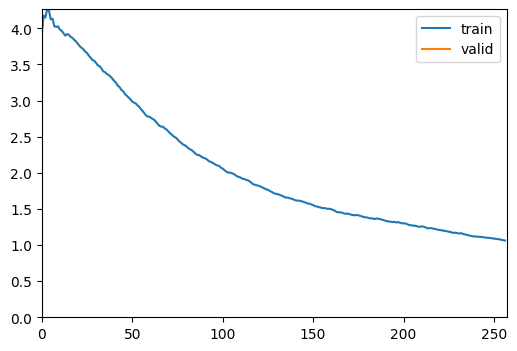

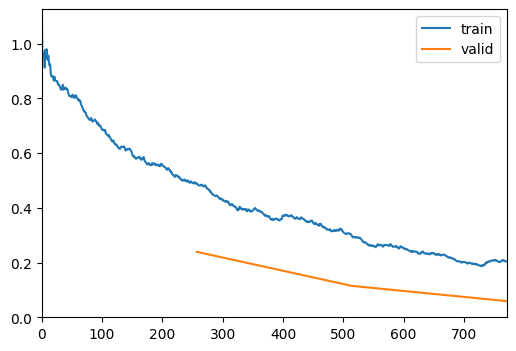

In [22]:
learner.fine_tune(3,base_lr=lr_steep,cbs=[ShowGraphCallback()])

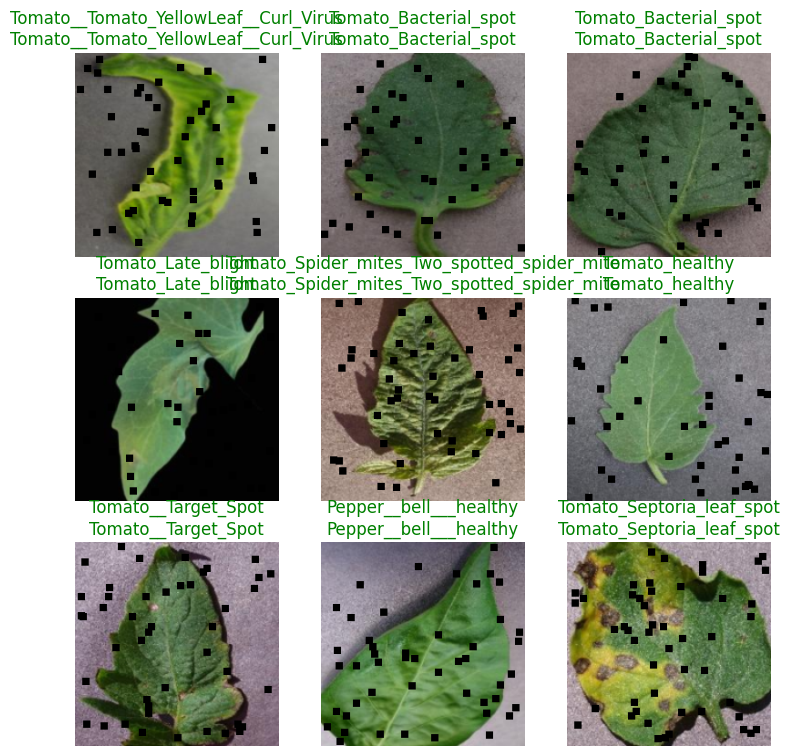

In [23]:
learner.show_results()

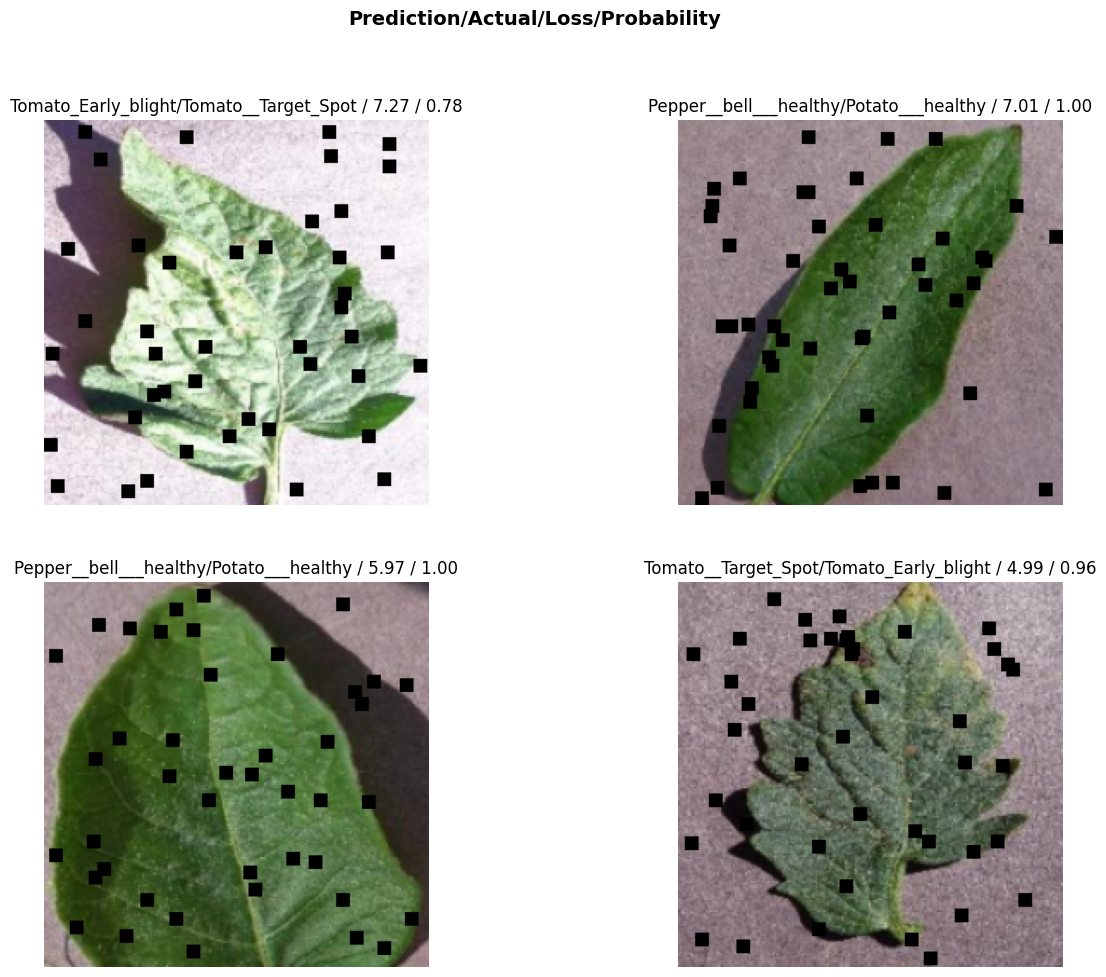

In [24]:
interpretation = ClassificationInterpretation.from_learner(learner)
losses, indices = interpretation.top_losses()
interpretation.plot_top_losses(4, figsize=(15,11))

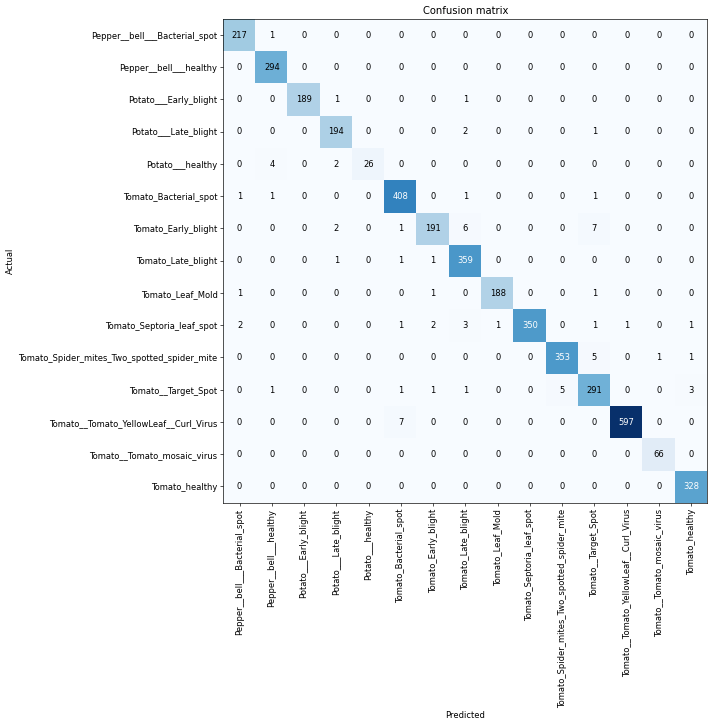

In [25]:
interpretation.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [26]:
interpretation.most_confused(min_val=4)

[('Tomato_Early_blight', 'Tomato_Late_blight', 8),
 ('Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Bacterial_spot', 8),
 ('Tomato_Early_blight', 'Tomato__Target_Spot', 7),
 ('Potato___healthy', 'Pepper__bell___healthy', 6),
 ('Tomato__Target_Spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 6),
 ('Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 4),
 ('Tomato__Target_Spot', 'Tomato_healthy', 4)]

### Try predicting custom images

In [27]:
learner.predict("/kaggle/input/plant-test/test/Tomato_healthy.jpg")

('Tomato_Late_blight',
 tensor(7),
 tensor([3.2899e-05, 1.8778e-03, 3.0770e-05, 4.4007e-05, 1.7052e-06, 6.3521e-06,
         1.2803e-02, 9.8505e-01, 2.1147e-05, 2.9408e-05, 7.5155e-06, 7.3689e-07,
         9.5466e-05, 3.3927e-06, 4.6831e-07]))

In [28]:
learner.predict("/kaggle/input/plant-test/test/Tomato_Septoria_leaf_spot.jpg")

('Tomato_Septoria_leaf_spot',
 tensor(9),
 tensor([1.8844e-03, 1.9388e-06, 3.1932e-04, 1.1864e-07, 8.3591e-06, 3.1955e-06,
         3.5181e-03, 2.2231e-06, 1.1988e-05, 9.9389e-01, 7.9648e-09, 2.0528e-05,
         3.6911e-07, 3.4088e-04, 1.4719e-06]))

### Save the model

In [29]:
learner.export('model.pkl')